In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
movie=[line.rstrip() for line in open(r"C:\Users\Tiger\Downloads\archive (5)\Genre Classification Dataset\train_data.txt", encoding="utf-8")]

In [3]:
movie[0]

'1 ::: Oscar et la dame rose (2009) ::: drama ::: Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [4]:
movie=pd.read_csv(r"C:\Users\Tiger\Downloads\archive (5)\Genre Classification Dataset\train_data.txt",sep=':::',names=['ID','Movie Title','Movie Genre','Movie Plot'])

C:\Users\Tiger\AppData\Local\Temp\ipykernel_14840\2691020449.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie=pd.read_csv(r"C:\Users\Tiger\Downloads\archive (5)\Genre Classification Dataset\train_data.txt",sep=':::',names=['ID','Movie Title','Movie Genre','Movie Plot'])


In [5]:
movie

,ID,Movie Title,Movie Genre,Movie Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [6]:
movie.head()

,ID,Movie Title,Movie Genre,Movie Plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
movie.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Movie Title  54214 non-null  object
 2   Movie Genre  54214 non-null  object
 3   Movie Plot   54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [9]:
movie.isna().sum()

ID             0
Movie Title    0
Movie Genre    0
Movie Plot     0
dtype: int64

In [10]:
movie['plot length'] = movie['Movie Plot'].apply(len)

In [11]:
movie.head(5)

,ID,Movie Title,Movie Genre,Movie Plot,plot length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


In [12]:
movie['Movie Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

[Text(0, 0, ' drama '),
 Text(1, 0, ' thriller '),
 Text(2, 0, ' adult '),
 Text(3, 0, ' documentary '),
 Text(4, 0, ' comedy '),
 Text(5, 0, ' crime '),
 Text(6, 0, ' reality-tv '),
 Text(7, 0, ' horror '),
 Text(8, 0, ' sport '),
 Text(9, 0, ' animation '),
 Text(10, 0, ' action '),
 Text(11, 0, ' fantasy '),
 Text(12, 0, ' short '),
 Text(13, 0, ' sci-fi '),
 Text(14, 0, ' music '),
 Text(15, 0, ' adventure '),
 Text(16, 0, ' talk-show '),
 Text(17, 0, ' western '),
 Text(18, 0, ' family '),
 Text(19, 0, ' mystery '),
 Text(20, 0, ' history '),
 Text(21, 0, ' news '),
 Text(22, 0, ' biography '),
 Text(23, 0, ' romance '),
 Text(24, 0, ' game-show '),
 Text(25, 0, ' musical '),
 Text(26, 0, ' war ')]

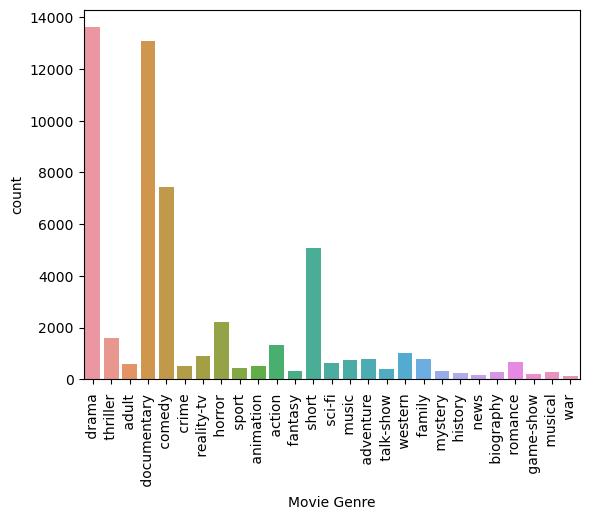

In [13]:
ax=sns.countplot(data=movie, x='Movie Genre')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) 

In [14]:
movie.groupby('Movie Genre').describe()

ID                                                         \
                 count          mean           std     min       25%      50%   
Movie Genre                                                                     
 action         1315.0  27162.849430  15596.461914    25.0  14004.50  27692.0   
 adult           590.0  26513.235593  15914.536411     3.0  12353.00  25752.0   
 adventure       775.0  27024.980645  15773.789085    45.0  13089.50  26393.0   
 animation       498.0  27162.475904  15665.179121    20.0  12846.25  28239.0   
 biography       265.0  28373.260377  16625.544815   244.0  15177.00  29217.0   
 comedy         7447.0  27172.094535  15653.511229     7.0  13531.50  27202.0   
 crime           505.0  28279.027723  15123.760451     8.0  16574.00  28866.0   
 documentary   13096.0  27147.011148  15657.482910     6.0  13528.75  27128.5   
 drama         13613.0  27156.412106  15603.485697     1.0  13616.00  27306.0   
 family          784.0  26737.114796  15769.230970    86.0  13184.00  26147.0   
 fantasy         323.0  26343.842105  15946.160637    26.0  11923.50  25550.0   
 game-show       194.0  26465.618557  15394.566919   739.0  13033.25  26698.5   
 history         243.0  27397.810700  15524.834370   135.0  14108.50  28903.0   
 horror         2204.0  27455.161525  15626.782600    10.0  14317.75  27689.5   
 music           731.0  26845.257182  15564.726951    35.0  13537.00  26574.0   
 musical         277.0  28433.779783  15891.203491   929.0  12829.00  31059.0   
 mystery         319.0  26779.257053  15258.477342    87.0  13887.50  26935.0   
 news            181.0  26672.762431  14960.413249   185.0  14353.00  25870.0   
 reality-tv      884.0  26909.113122  15744.132677     9.0  13794.75  26622.0   
 romance         672.0  27772.313988  15661.501889   280.0  14203.50  27948.0   
 sci-fi          647.0  26723.680062  15668.389983    28.0  13412.00  26668.0   
 short          5073.0  26827.945200  15659.682164    27.0  13609.00  26389.0   
 sport           432.0  27474.361111  15788.744106    19.0  13882.50  27114.0   
 talk-show       391.0  26653.202046  15434.125037    55.0  12717.50  27258.0   
 thriller       1591.0  26475.610937  15820.735431     2.0  12791.50  26165.0   
 war             132.0  27002.022727  15587.891629  1179.0  14673.25  25965.5   
 western        1032.0  27096.913760  15829.063572    79.0  12610.25  27453.0   

                                 plot length                                 \
                    75%      max       count        mean         std    min   
Movie Genre                                                                   
 action        40548.50  54121.0      1315.0  574.662357  389.318413  107.0   
 adult         40350.00  54023.0       590.0  486.989831  304.003954   76.0   
 adventure     41550.00  54017.0       775.0  545.280000  394.433867  148.0   
 animation     40360.75  54101.0       498.0  537.022088  325.195743  112.0   
 biography     42800.00  54154.0       265.0  639.784906  434.984155   84.0   
 comedy        40548.50  54213.0      7447.0  556.194172  412.515219   42.0   
 crime         41747.00  54139.0       505.0  560.142574  439.021033  105.0   
 documentary   40709.25  54212.0     13096.0  656.010614  454.061387   47.0   
 drama         40738.00  54208.0     13613.0  631.664585  493.684337   48.0   
 family        40281.00  54209.0       784.0  577.554847  375.212974  123.0   
 fantasy       41279.50  54204.0       323.0  575.572755  361.554679   82.0   
 game-show     40153.00  53955.0       194.0  758.907216  784.993008  158.0   
 history       39650.00  54214.0       243.0  602.057613  400.082229  120.0   
 horror        41136.25  54211.0      2204.0  601.540381  488.127321  121.0   
 music         40177.00  54207.0       731.0  552.756498  369.173903   63.0   
 musical       42501.00  53837.0       277.0  573.350181  359.751056   77.0   
 mystery       39378.50  54030.0       319.0  661.163009  795.749877  149.0   
 news    

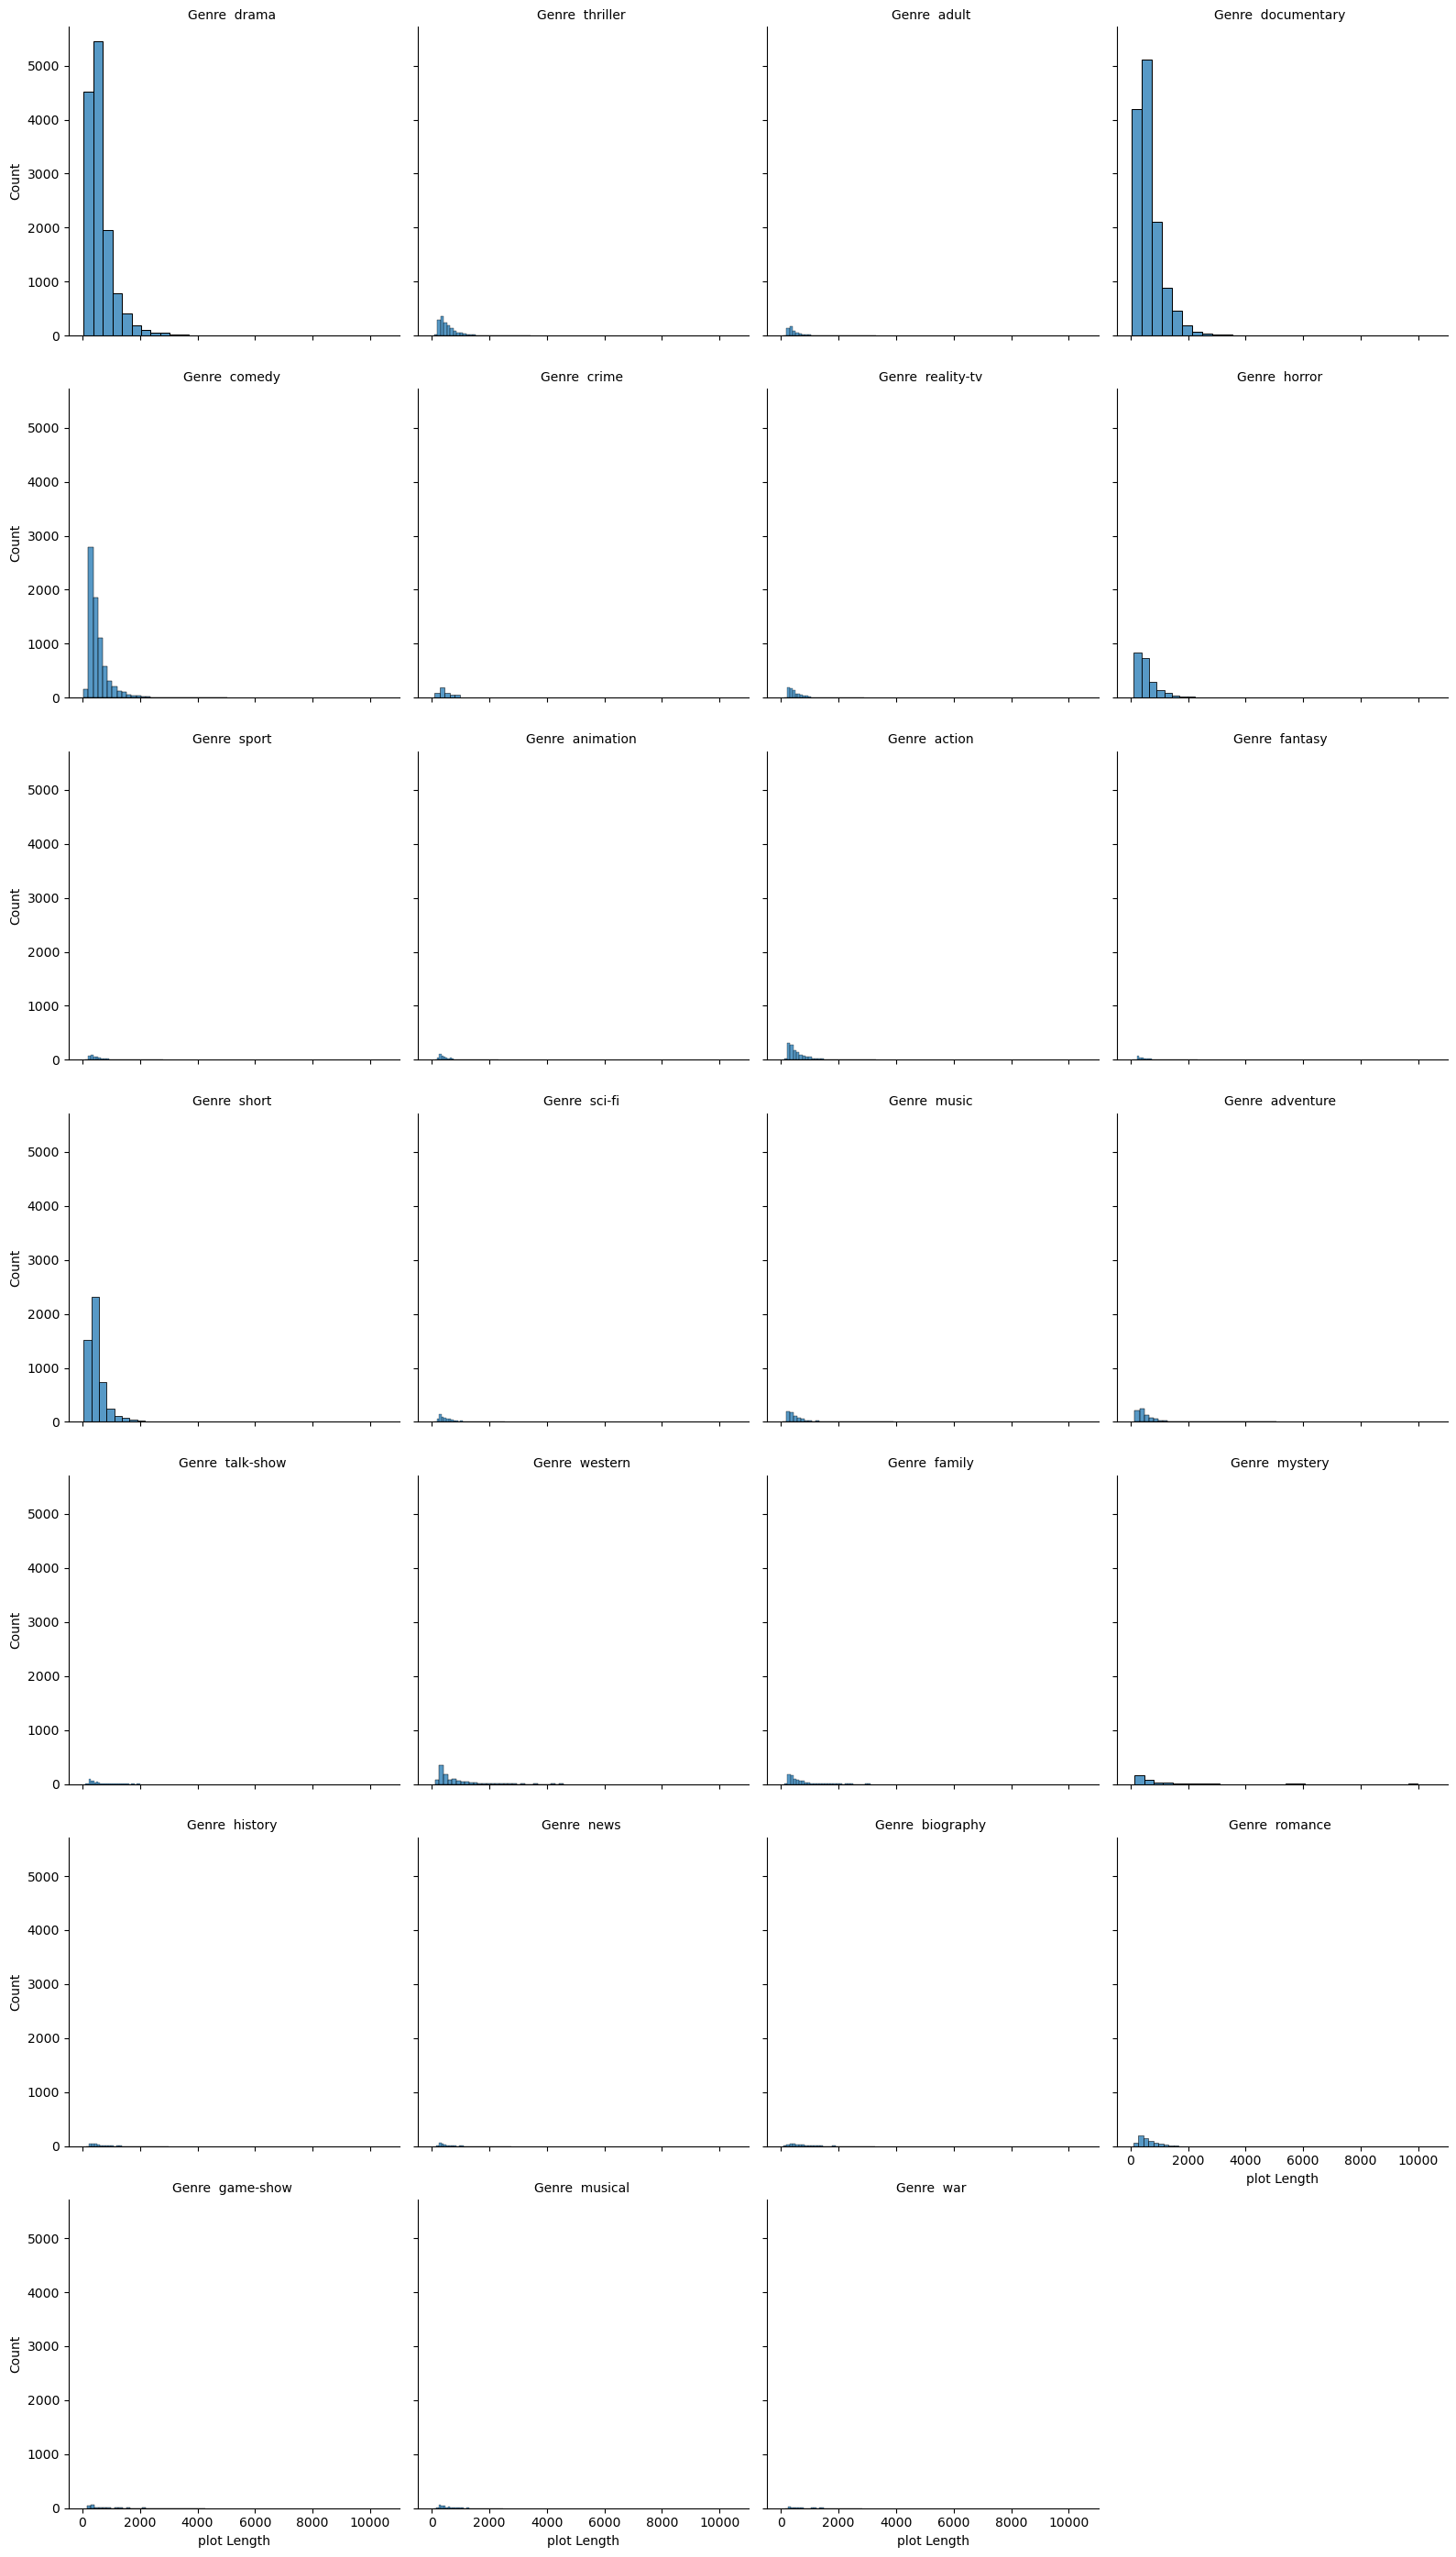

In [15]:
g = sns.FacetGrid(movie,col='Movie Genre',height=4,col_wrap=4)
g.map(sns.histplot,'plot length',bins=30)
g.set_axis_labels("plot Length","Count")
g.set_titles("Genre {col_name}")
plt.show()

In [16]:
movie_test=pd.read_csv(r"C:\Users\Tiger\Downloads\archive (5)\Genre Classification Dataset\test_data.txt",sep=':::',names=['ID','Movie Title','Movie Plot'])

C:\Users\Tiger\AppData\Local\Temp\ipykernel_14840\3149496678.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie_test=pd.read_csv(r"C:\Users\Tiger\Downloads\archive (5)\Genre Classification Dataset\test_data.txt",sep=':::',names=['ID','Movie Title','Movie Plot'])


In [17]:
movie_test

,ID,Movie Title,Movie Plot
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [18]:
from nltk.corpus import stopwords

In [19]:
plot5=movie['Movie Plot'][4]
plot5

" The film's title refers not only to the un-recovered bodies at ground zero, but also to the state of the nation at large. Set in the hallucinatory period of time between September 11 and Halloween of 2001, The Unrecovered examines the effect of terror on the average mind, the way a state of heightened anxiety and/or alertness can cause the average person to make the sort of imaginative connections that are normally made only by artists and conspiracy theorists-both of whom figure prominently in this film. The Unrecovered explores the way in which irony, empathy, and paranoia relate to one another in the wake of 9/11."

In [20]:
def text_process(mess):

    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
movie['Movie Plot'].head(5).apply(text_process)

0    [Listening, conversation, doctor, parents, 10y...
1    [brother, sister, past, incestuous, relationsh...
2    [bus, empties, students, field, trip, Museum, ...
3    [help, unemployed, father, make, ends, meet, E...
4    [films, title, refers, unrecovered, bodies, gr...
Name: Movie Plot, dtype: object

In [22]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(movie['Movie Plot'].head(5000))
print(len(bow_transformer.vocabulary_))

44024


I have to take 5000 rows because my laptop is too slow to process all the 50000 rows. For 5 thousands rows, after transforming its length is 44024 which will surely increase if I would take 50 thousands rows for processing.

In [23]:
movie=movie.head(5000)

In [24]:
movie

,ID,Movie Title,Movie Genre,Movie Plot,plot length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625
...,...,...,...,...,...
4995,4996,The Twelve Dancing Princesses (????),fantasy,A great mystery shrouds the castle in the Bro...,1197
4996,4997,Una mujer decente (1950),drama,This is about a woman who could not find her ...,803
4997,4998,Cielo ciego (1998),drama,This is a film about the life of a family of ...,442
4998,4999,43rd Annual Pig Bowl/Guns & Hoses XV (2017),sport,Access Sacramento presents live television co...,324


In [25]:
movie_bow = bow_transformer.transform(movie['Movie Plot'])

In [26]:
tfidf_transformer = TfidfTransformer().fit(movie_bow)

In [27]:
movie_tfidf = tfidf_transformer.transform(movie_bow)

In [29]:
print(movie_tfidf.shape)

(5000, 44024)


In [30]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(movie_tfidf, movie['Movie Genre'])

In [32]:
pred=spam_detect_model.predict(movie_tfidf)
print(pred)

[' drama ' ' drama ' ' drama ' ... ' drama ' ' documentary ' ' drama ']


In [33]:
from sklearn.metrics import classification_report
print (classification_report(movie['Movie Genre'], pred))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00       121
       adult        0.00      0.00      0.00        58
   adventure        0.00      0.00      0.00        68
   animation        0.00      0.00      0.00        48
   biography        0.00      0.00      0.00        32
      comedy        0.96      0.15      0.26       701
       crime        0.00      0.00      0.00        38
 documentary        0.63      0.96      0.76      1198
       drama        0.40      0.98      0.57      1252
      family        0.00      0.00      0.00        72
     fantasy        0.00      0.00      0.00        33
   game-show        0.00      0.00      0.00        19
     history        0.00      0.00      0.00        23
      horror        0.00      0.00      0.00       189
       music        0.00      0.00      0.00        61
     musical        0.00      0.00      0.00        19
     mystery        0.00      0.00      0.00        31
        n

C:\Users\Tiger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tiger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tiger\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
